In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from tools import preprocesamiento

In [15]:

df = pd.read_csv("../data/toi.csv", comment='#')

print(f"Forma del DataFrame: {df.shape}")
print(f"Primeras columnas: {list(df.columns[:5])}")
df.head()

Forma del DataFrame: (7699, 27)
Primeras columnas: ['rowid', 'toi', 'toipfx', 'tid', 'ctoi_alias']


,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,...,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,-12d41m45.46s,...,5.818163,22601.948581,3127.204052,9.604000,485.735,10249.0,4.19,2.16986,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,-05d30m49.87s,...,11.215400,44464.500000,4045.000000,9.423440,295.862,7070.0,4.03,2.01000,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,-10d34m49.64s,...,23.752900,2860.610000,2037.000000,9.299501,943.109,8924.0,NaN,5.73000,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,-25d12m25.26s,...,NaN,1177.360000,1631.000000,9.300300,7728.170,5388.5,4.15,NaN,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,-48d48m10.12s,...,11.311300,54679.300000,4260.000000,9.135500,356.437,9219.0,4.14,2.15000,2019-07-24 15:58:33,2024-09-09 10:08:01


C:\Users\franc\AppData\Local\Temp\ipykernel_4556\3299518683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disposition_counts.index, y=disposition_counts.values, palette='viridis')


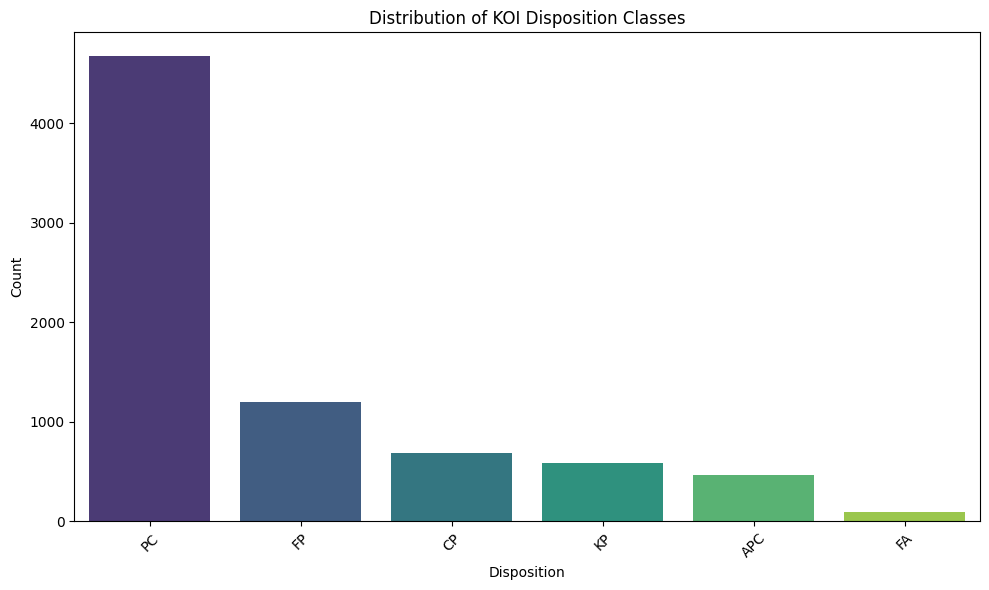

PC: 4678 (60.76%)
FP: 1196 (15.53%)
CP: 683 (8.87%)
KP: 583 (7.57%)
APC: 461 (5.99%)
FA: 98 (1.27%)


In [17]:
# Analyze and plot the distribution of disposition classes in the KOI dataset
plt.figure(figsize=(10, 6))
disposition_counts = df['tfopwg_disp'].value_counts()
sns.barplot(x=disposition_counts.index, y=disposition_counts.values, palette='viridis')
plt.title('Distribution of KOI Disposition Classes')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display percentage of each class
percentage = (disposition_counts / disposition_counts.sum() * 100).round(2)
for disposition, count in zip(disposition_counts.index, disposition_counts.values):
    print(f"{disposition}: {count} ({percentage[disposition]}%)")

In [ ]:
df["disposition"]

In [ ]:
df = df[['koi_period', 'koi_time0bk', 'koi_duration', 'koi_depth',
 'koi_impact', 'koi_ror',
 'koi_eccen', 'koi_incl',
 'koi_num_transits', 'koi_count',
 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass',
 'ra', 'dec', 'koi_kepmag', 'koi_disposition']]
df.head()

In [ ]:
df.info()

In [ ]:
df.dropna(inplace=True)
df.info()

In [ ]:
df_conf = df[df["koi_disposition"].isin(["FALSE POSITIVE", "CONFIRMED"])].copy()
df_conf["koi_disposition"].value_counts()


In [ ]:
df_cand = df[df["koi_disposition"].isin(["CANDIDATE"])].copy()
df_cand["koi_disposition"].value_counts()


In [ ]:
y_conf = df_conf['koi_disposition']
y_cand = df_cand['koi_disposition']
df_conf.drop(columns = ['koi_disposition'], inplace=True)
df_cand.drop(columns = ['koi_disposition'], inplace=True)
print(y_conf)
print(y_cand)

In [ ]:
le = LabelEncoder()
y_conf_encoded = le.fit_transform(y_conf)
y_cand_encoded = le.fit_transform(y_cand)

X_train, X_test, y_train, y_test = train_test_split(df_conf, y_conf_encoded, test_size=0.2, random_state=42, stratify=y_conf_encoded)

# Create a pipeline for data preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
])

# Apply the pipeline to training data
X_train_t = pipeline.fit_transform(X_train, y_train)
X_test_t = pipeline.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train different classification models

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train models and store results
results = {}
for name, model in models.items():
    model.fit(X_train_t, y_train)
    y_pred = model.predict(X_test_t)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': acc}
    print(f"{name} Test accuracy: {acc:.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")

# Generate predictions with the best model
y_pred_best_train = best_model.predict(X_train_t)
cm_best_train = confusion_matrix(y_train, y_pred_best_train)

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
sns.heatmap(cm_best_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Accuracy: {best_accuracy:.4f})')
plt.tight_layout()


# Generate predictions with the best model
y_pred_best = best_model.predict(X_test_t)
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Accuracy: {best_accuracy:.4f})')
plt.tight_layout()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Initialize SVM classifier
svm = SVC(probability=True, random_state=42)

# Grid search with cross-validation
grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

# Fit the model
grid_search_svm.fit(X_train_t, y_train)

# Print results
print("Mejores hiperparámetros encontrados:")
print(grid_search_svm.best_params_)
print(f"Mejor accuracy en validación cruzada: {grid_search_svm.best_score_:.4f}")

# Test the model with best parameters
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_t)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test accuracy: {acc_svm:.4f}")

# Compare with the current best model
print(f"Current best model ({best_model_name}) accuracy: {best_accuracy:.4f}")

# Plot confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - SVM (Accuracy: {acc_svm:.4f})')
plt.tight_layout()

In [ ]:
import joblib

# Save the best model (Random Forest) to a file
model_filename = "random_forest_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

# Feature importance analysis for Random Forest
feature_importances = best_model.feature_importances_
features = df.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 most important features:")
print(importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

## Gridsearch para random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train_t, y_train)



In [ ]:
cm_best_rf = confusion_matrix(y_train, y_pred_best)
plt.figure(figsize=(10, 8))
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - SVM (Accuracy: {acc_svm:.4f})')
plt.tight_layout()

In [ ]:
cm_best_rf = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - SVM (Accuracy: {acc_svm:.4f})')
plt.tight_layout()

## Gridsearch para xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definir el espacio de búsqueda de hiperparámetros para XGBoost
param_grid = {
    'n_estimators': [150, 200, 250],           # Número de árboles (equivalente a RandomForest)
    'max_depth': [3, 6, 10],                  # Profundidad máxima (XGBoost usa valores más bajos)
    'learning_rate': [0.01, 0.1, 0.2],        # Tasa de aprendizaje (específico de XGBoost)
    'subsample': [0.8, 0.9, 1.0],             # Fracción de muestras por árbol
    'colsample_bytree': [0.8, 0.9, 1.0],      # Fracción de características por árbol
    'reg_alpha': [0, 0.1, 1],                 # Regularización L1
    'reg_lambda': [1, 1.5, 2]                 # Regularización L2
}

# Crear el clasificador XGBoost
xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # Para evitar warnings
    use_label_encoder=False  # Para evitar warnings de deprecación
)

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train_t, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test_t)
acc = accuracy_score(y_test, y_pred)
results[name] = {'model': model, 'accuracy': acc}
print(f"Test accuracy: {acc:.4f}")

## Usando el preprocesamiento automático

In [8]:
X_train, X_test, y_train, y_test, X_candidate = preprocesamiento('k2')

In [9]:
X_candidate

array([[-2.86176022,  1.49557652, -0.26531226, ...,  0.        ,
        -0.15817182,  0.        ],
       [-2.86064851, -0.66863847, -0.26531226, ...,  0.        ,
        -0.15817182,  0.        ],
       [-2.8595368 ,  1.49557652, -0.26531226, ...,  0.        ,
        -0.15817182,  0.        ],
       ...,
       [-0.8784648 ,  1.49557652, -0.26531226, ...,  0.        ,
        -0.15817182,  0.        ],
       [-0.87512966,  1.49557652, -0.26531226, ...,  0.        ,
        -0.15817182,  0.        ],
       [-0.87401795,  1.49557652, -0.26531226, ...,  0.        ,
        -0.15817182,  0.        ]])

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train different classification models

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train models and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': acc}
    print(f"{name} Test accuracy: {acc:.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")

# Generate predictions with the best model
y_pred_best_train = best_model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_best_train)
cm_best_train = confusion_matrix(y_train, y_pred_best_train)

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
unique_labels = sorted(np.unique(y_train))
sns.heatmap(cm_best_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels= unique_labels, 
            yticklabels= unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Accuracy: {acc_train:.4f})')
plt.tight_layout()


# Generate predictions with the best model
y_pred_best = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_labels, 
            yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Accuracy: {best_accuracy:.4f})')
plt.tight_layout()

# Guardar el mejor modelo (Random Forest) en un archivo
model_filename = "random_forest_model_k2.pkl"

NameError: name 'X_train' is not defined

# Columnas en TOI

In [2]:
def regresar_columnas(dataset):
    import pandas as pd
    path = "../data/" + dataset + ".csv"
    df = pd.read_csv(path, comment = '#')
    if dataset == 'koi':
        df.rename(columns={'koi_disposition': 'disposition'}, inplace=True)
        df_confirmed = df[df["disposition"].isin(["FALSE POSITIVE", "CONFIRMED"])].copy()
        df_candidate = df[df["disposition"].isin(["CANDIDATE"])].copy()
    elif dataset == 'k2':
        df_confirmed = df[df["disposition"].isin(["FALSE POSITIVE", "CONFIRMED"])].copy()
        df_candidate = df[df["disposition"].isin(["CANDIDATE"])].copy()
    elif dataset == 'toi':
        df.rename(columns={'tfopwg_disp': 'disposition'}, inplace=True)
        df = df[df['disposition'].isin(["CP", "KP", "FP", "PC"])].copy()
        disposition_mapping = {'CP': 'CONFIRMED', 'KP': 'CONFIRMED', 'FP': 'FALSE POSITIVE', 'PC': 'CANDIDATE'}
        df['disposition'] = df['disposition'].map(disposition_mapping)
        df_confirmed = df[df["disposition"].isin(["FALSE POSITIVE", "CONFIRMED"])].copy()
        df_candidate = df[df["disposition"].isin(["CANDIDATE"])].copy()
        
    # Borrar columnas que los candidatos tengan vacías
    for column in df_candidate.columns:
        if df_candidate[column].nunique() == 0:
            df_confirmed.drop(columns= column, inplace = True)            

    # Borrar columnas que no son datos numéricos
    object_cols = df_candidate.select_dtypes(include=['object']).columns
    if 'disposition' in object_cols:
        object_cols = object_cols.drop('disposition')
    df_candidate.drop(columns = object_cols, inplace = True)

    # Borrar filas que tengan al menos un dato nulo
    df_candidate.dropna(inplace=True)

    return df_candidate.columns

In [6]:
print(regresar_columnas('k2'))

Index(['rowid', 'default_flag', 'disposition', 'sy_snum', 'sy_pnum', 'sy_mnum',
       'cb_flag', 'disc_year', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag',
       'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag',
       'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade',
       'pl_radj', 'pl_masse', 'pl_massj', 'pl_msinie', 'pl_msinij',
       'pl_cmasse', 'pl_cmassj', 'pl_bmasse', 'pl_bmassj', 'pl_dens',
       'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl', 'pl_tranmid',
       'ttv_flag', 'pl_imppar', 'pl_trandep', 'pl_trandur', 'pl_ratdor',
       'pl_ratror', 'pl_occdep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp',
       'pl_projobliq', 'pl_trueobliq', 'st_teff', 'st_rad', 'st_mass',
       'st_met', 'st_lum', 'st_logg', 'st_age', 'st_dens', 'st_vsin',
       'st_rotp', 'st_radv', 'ra', 'dec', 'glat', 'glon', 'elat', 'elon',
       'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_bmag',
       'sy_vmag', 'sy_jmag', 'sy_hmag', 'sy_kmag', 's

### k2
dis

# reducción de la dimensión para candidate

In [12]:
X_train, X_test, y_train, y_test, X_candidate = preprocesamiento("koi")

Random Forest Test accuracy: 0.9906
Gradient Boosting Test accuracy: 0.9974
SVC Test accuracy: 0.9726
KNN Test accuracy: 0.9461
Logistic Regression Test accuracy: 0.9786

Best model: Gradient Boosting with accuracy: 0.9974


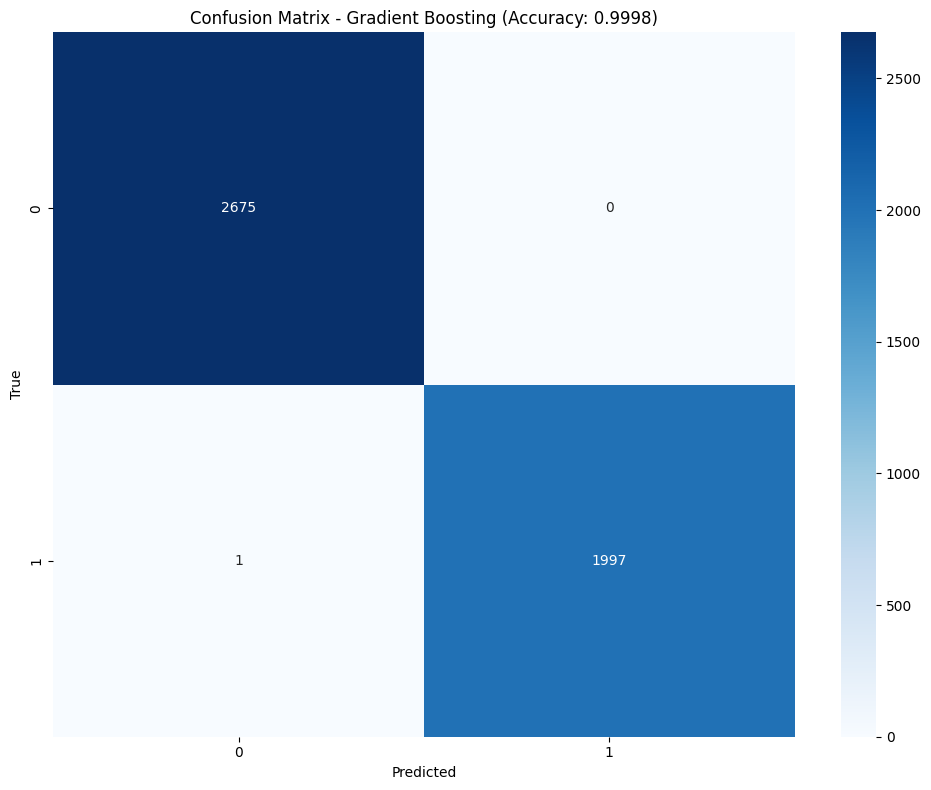

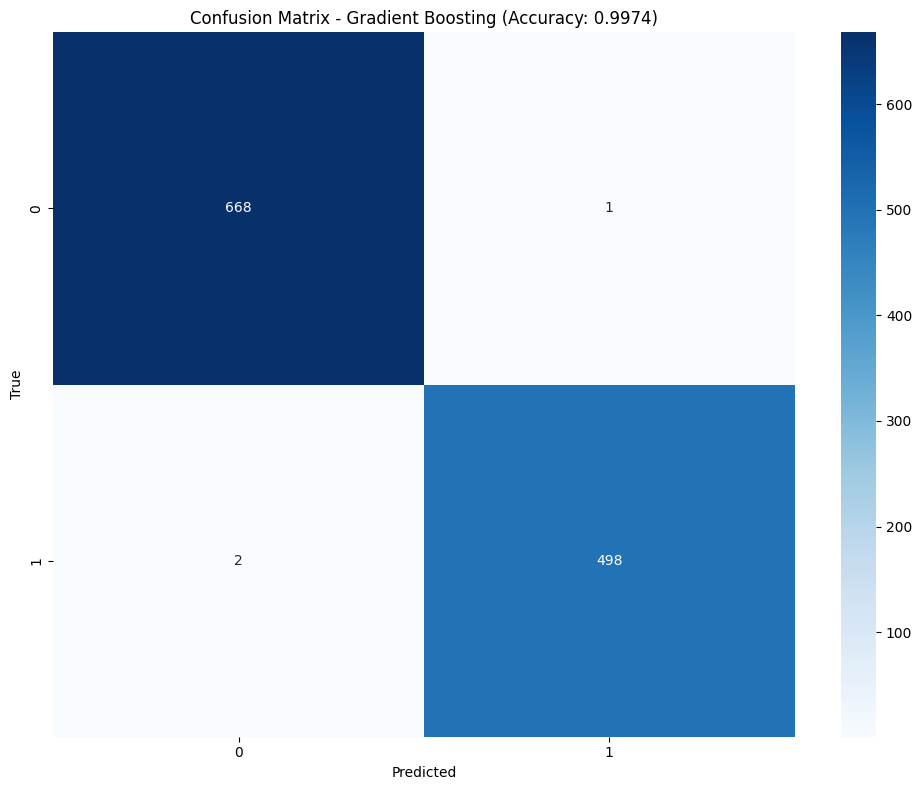

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train different classification models

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train models and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': acc}
    print(f"{name} Test accuracy: {acc:.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")

# Generate predictions with the best model
y_pred_best_train = best_model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_best_train)
cm_best_train = confusion_matrix(y_train, y_pred_best_train)

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
unique_labels = sorted(np.unique(y_train))
sns.heatmap(cm_best_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels= unique_labels, 
            yticklabels= unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Accuracy: {acc_train:.4f})')
plt.tight_layout()


# Generate predictions with the best model
y_pred_best = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_labels, 
            yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Accuracy: {best_accuracy:.4f})')
plt.tight_layout()

# Guardar el mejor modelo (Random Forest) en un archivo
model_filename = "random_forest_model_k2.pkl"

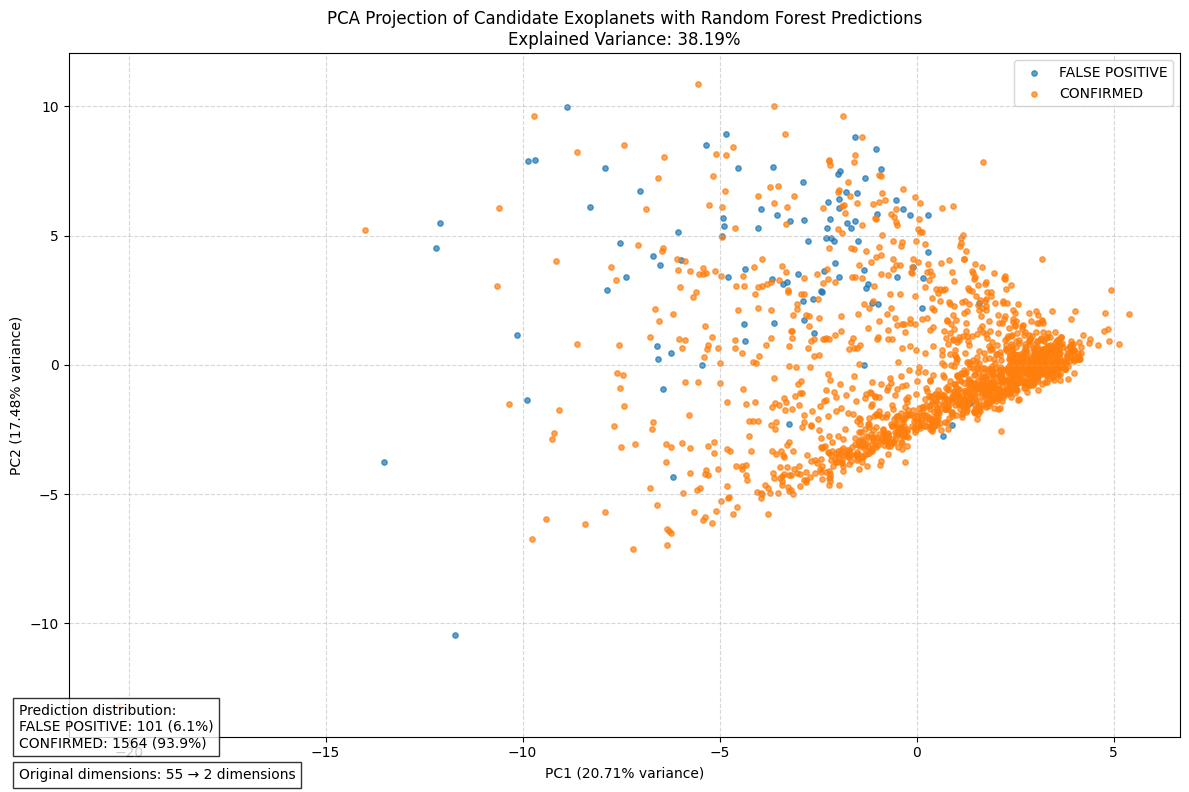

In [14]:
# Use the best model (Random Forest) to predict classes for candidate exoplanets
X_candidate_predictions = best_model.predict(X_candidate)

# Apply PCA to reduce X_candidate to 2 dimensions for visualization
pca = PCA(n_components=2)
X_candidate_2d = pca.fit_transform(X_candidate)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
total_variance = sum(explained_variance)

# Create a colormap for the two classes
colors = {0: '#1f77b4', 1: '#ff7f0e'}  # Blue for class 0, Orange for class 1
class_labels = {0: 'FALSE POSITIVE', 1: 'CONFIRMED'}

# Plot the PCA projection with predictions colored
plt.figure(figsize=(12, 8))
for class_val in np.unique(X_candidate_predictions):
    # Get indices for each predicted class
    idx = np.where(X_candidate_predictions == class_val)
    
    # Plot points for this class
    plt.scatter(X_candidate_2d[idx, 0], X_candidate_2d[idx, 1], 
                c=colors[class_val], s=15, alpha=0.7, label=class_labels[class_val])

# Add plot details
plt.title(f'PCA Projection of Candidate Exoplanets with Random Forest Predictions\nExplained Variance: {total_variance:.2%}')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Add information about dimensionality reduction
plt.figtext(0.02, 0.02, f"Original dimensions: {X_candidate.shape[1]} → 2 dimensions", 
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Add classification statistics
class_counts = np.bincount(X_candidate_predictions)
plt.figtext(0.02, 0.06, 
            f"Prediction distribution:\n{class_labels[0]}: {class_counts[0]} ({class_counts[0]/len(X_candidate_predictions):.1%})\n{class_labels[1]}: {class_counts[1]} ({class_counts[1]/len(X_candidate_predictions):.1%})", 
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [24]:
    # Borrar columnas que los candidatos tengan vacías
df = pd.read_csv("../data/k2.csv", comment='#')

print(f"Forma del DataFrame: {df.shape}")
print(f"Primeras columnas: {list(df.columns[:5])}")
df.head()

Forma del DataFrame: (4004, 129)
Primeras columnas: ['rowid', 'pl_name', 'hostname', 'pl_letter', 'k2_name']


,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-02-15,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2016-07-28,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-04-26,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_confirmed = df[df["disposition"].isin(["FALSE POSITIVE", "CONFIRMED"])].copy()
df_candidate = df[df["disposition"].isin(["CANDIDATE"])].copy()

In [27]:
df_candidate.head()

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
3,4,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,EPIC 201126503.01,EPIC 201126503,NaN,NaN,EPIC 201126503,EPIC 201126503.01,NaN,NaN,TIC 380166702,...,2015-12-05,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,EPIC 201127519.01,EPIC 201127519,NaN,NaN,EPIC 201127519,EPIC 201127519.01,NaN,NaN,TIC 96244568,...,2018-02-15,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,EPIC 201127519.01,EPIC 201127519,NaN,NaN,EPIC 201127519,EPIC 201127519.01,NaN,NaN,TIC 96244568,...,2018-08-02,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
for column in df_candidate.columns:
    if df_candidate[column].nunique() == 0:
        df_confirmed.drop(columns= column, inplace = True)
        df_candidate.drop(columns= column, inplace = True)

In [18]:
object_cols = df_candidate.select_dtypes(include=['object']).columns
if 'disposition' in object_cols:
    object_cols = object_cols.drop('disposition')
df_confirmed.drop(columns = object_cols, inplace = True)
df_candidate.drop(columns = object_cols, inplace = True)

In [19]:
len(df_candidate)

1374

In [21]:
for column in df_candidate.columns:
    df_candidate[column].notna().sum() < len(df_candidate)*0.9
    df_candidate.drop(columns=column, inplace= True)

In [22]:
df_candidate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 3 to 2709
Empty DataFrame


In [23]:
df_candidate

""
3
4
5
6
7
...
1781
1787
1790
1791


In [7]:
_, _, _, _, toi_candidate = preprocesamiento("toi")
_, _, _, _, k2_candidate = preprocesamiento("k2")
_, _, _, _, koi_candidate = preprocesamiento("koi")

In [15]:
toi_candidate.columns

Index(['rowid', 'toi', 'toipfx', 'tid', 'ctoi_alias', 'pl_pnum', 'ra', 'dec',
       'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh',
       'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist',
       'st_teff', 'st_rad'],
      dtype='object')

### K2 columnas
rowid: Identificador interno de la fila en la base de datos.
default_flag: Indica si este es el registro principal del planeta entre posibles duplicados.
sy_snum: Número de estrellas en el sistema.
sy_pnum: Número de planetas en el sistema.
sy_mnum: Número de lunas detectadas en el sistema (si aplica).
cb_flag: El planeta orbita un sistema binario.
disc_year: Año en que se descubrió el planeta.
rv_flag: El planeta fue detectado mediante velocidad radial.
pul_flag: El planeta fue detectado por el método de púlsares.
ptv_flag: El planeta fue detectado por variaciones en el tiempo del brillo.
tran_flag: El planeta fue detectado por tránsito (cuando pasa delante de la estrella).
obm_flag: El planeta fue detectado por observación directa (imagen).
micro_flag: El planeta fue detectado mediante microlente gravitacional.
etv_flag: Descubierto por variaciones en el tiempo de eclipses.
ima_flag: Confirmado mediante imágenes de alta resolución.
dkin_flag: Confirmado por movimiento dinámico del sistema.
pl_controv_flag: Hay controversia sobre si realmente es un planeta.
pl_orbper: Período orbital del planeta (días).
pl_tranmid: Momento central del último tránsito registrado.
ttv_flag: Presenta variaciones en el tiempo de tránsito (indica perturbaciones).
st_rad: Radio de la estrella (en radios solares).
ra: Ascensión recta (coordenada espacial en el cielo).
dec: Declinación (otra coordenada espacial en el cielo).
glat: Latitud galáctica.
glon: Longitud galáctica.
elat: Latitud eclíptica.
elon: Longitud eclíptica.
sy_pm: Movimiento propio total de la estrella.
sy_pmra: Movimiento propio en ascensión recta.
sy_pmdec: Movimiento propio en declinación.
sy_dist: Distancia al sistema (en parsecs).
sy_bmag: Magnitud en banda B (azul).
sy_vmag: Magnitud en banda V (visible).
sy_jmag: Magnitud en banda J (infrarrojo cercano).
sy_hmag: Magnitud en banda H (infrarrojo cercano).
sy_kmag: Magnitud en banda K (infrarrojo cercano).
sy_w1mag: Magnitud en banda W1 (infrarrojo medio).
sy_w2mag: Magnitud en banda W2 (infrarrojo medio).
sy_w3mag: Magnitud en banda W3 (infrarrojo medio).
sy_w4mag: Magnitud en banda W4 (infrarrojo medio).
sy_gaiamag: Magnitud medida por Gaia.
sy_tmag: Magnitud en banda TESS.
sy_kepmag: Magnitud en banda Kepler.
pl_nnotes: Número de notas asociadas al planeta en el catálogo.
k2_campaigns_num: Número de campañas de K2 en las que fue observado.
st_nphot: Número de observaciones fotométricas de la estrella.
st_nrvc: Número de mediciones de velocidad radial de la estrella.
st_nspec: Número total de espectros tomados de la estrella.
pl_nespec: Número de espectros en los que aparece el planeta.
pl_ntranspec: Número de espectros durante tránsitos.
pl_ndispec: Número de espectros tomados fuera de tránsitos.

## koi

In [4]:
# Save koi_candidate dataframe as CSV
koi_candidate.to_csv("koi_candidate_data.csv", index=True)
k2_candidate.to_csv("k2_candidate_data.csv", index=True)
toi_candidate.to_csv("toi_candidate_data.csv", index=True)

print(f"Files saved successfully:")
print(f"- koi_candidate_data.csv: {koi_candidate.shape[0]} rows, {koi_candidate.shape[1]} columns")
print(f"- k2_candidate_data.csv: {k2_candidate.shape[0]} rows, {k2_candidate.shape[1]} columns")
print(f"- toi_candidate_data.csv: {toi_candidate.shape[0]} rows, {toi_candidate.shape[1]} columns")

Files saved successfully:
- koi_candidate_data.csv: 1665 rows, 56 columns
- k2_candidate_data.csv: 1210 rows, 51 columns
- toi_candidate_data.csv: 4140 rows, 21 columns


In [13]:
for column in koi_candidate.columns:
    if koi_candidate[column].nunique() == 1:
        print(column)

koi_fpflag_co
koi_fpflag_ec
koi_eccen
koi_ldm_coeff4
koi_ldm_coeff3
